# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os
from sklearn import metrics
import random as python_random
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras

In [2]:
# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)

# 2. Remove dodgy images

In [3]:
import cv2
import imghdr

In [4]:
# data_dir = 'data' 

train_dir = 'data/Train/'
test_dir = 'data/Test/'

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(train_dir): 
    for image in os.listdir(os.path.join(train_dir, image_class)):
        image_path = os.path.join(train_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [7]:
for image_class in os.listdir(test_dir): 
    for image in os.listdir(os.path.join(test_dir, image_class)):
        image_path = os.path.join(test_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
# data = tf.keras.utils.image_dataset_from_directory('data') changed from relative path to variable

train_data = tf.keras.utils.image_dataset_from_directory(train_dir)

Found 366 files belonging to 4 classes.


2022-11-07 19:29:43.284564: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


testData = tf.keras.preprocessing.image_dataset_from_directory(
    dataDirectory,
    labels='inferred',
    label_mode='categorical',
    seed=324893,
    image_size=(height,width),
    batch_size=32)


predictions = np.array([])
labels =  np.array([])
for x, y in testData:
  predictions = np.concatenate([predictions, model.predict_classes(x)])
  labels = np.concatenate([labels, np.argmax(y.numpy())])

In [9]:
print (image_path)

data/Test/Rot_Apple/rot_35.jpg


In [10]:
print (train_data.class_names)

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


In [11]:
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size=115)

Found 115 files belonging to 4 classes.


In [12]:
# data_iterator = data.as_numpy_iterator()
train_iterator = train_data.as_numpy_iterator()

In [13]:
test_iterator = test_data.as_numpy_iterator()

In [14]:
# batch = data_iterator.next()
train_batch = train_iterator.next()

In [15]:
test_batch = test_iterator.next()

VISUALISE TRAIN AND TEST DATA

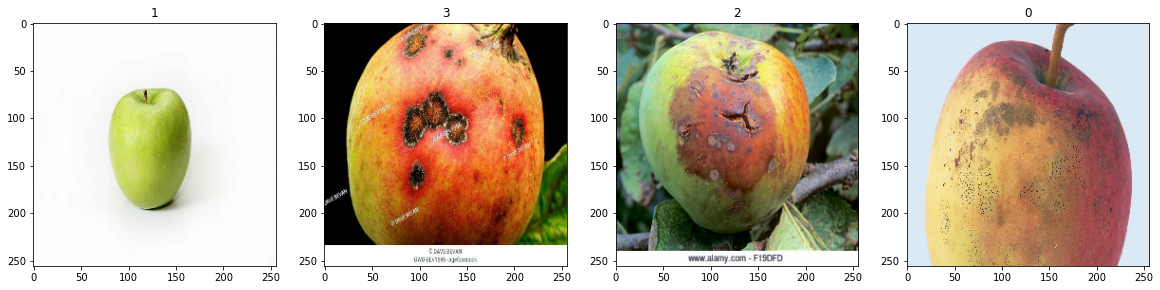

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

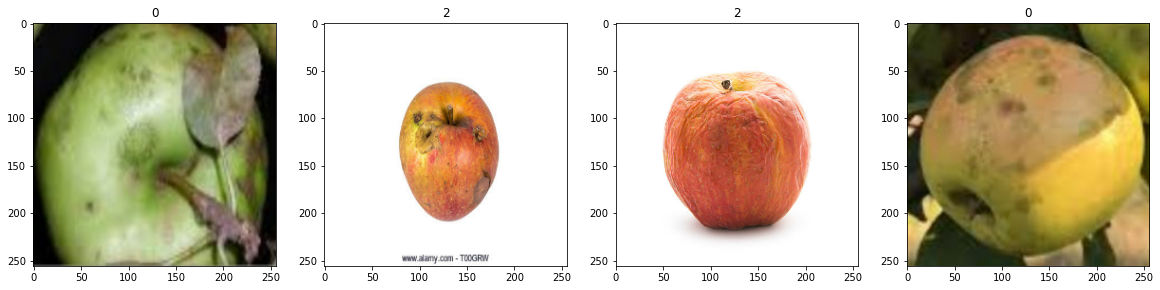

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(test_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(test_batch[1][idx])

# 4. Scale Data

In [18]:
train_data = train_data.map(lambda x,y: (x/255, y))

In [19]:
test_data = test_data.map(lambda x,y: (x/255, y))

In [20]:
train_data.as_numpy_iterator().next()

(array([[[[0.68013173, 0.695818  , 0.64091605],
          [0.63514096, 0.6508272 , 0.5952589 ],
          [0.5927466 , 0.6084329 , 0.5473882 ],
          ...,
          [0.6599341 , 0.6638557 , 0.6011106 ],
          [0.6523131 , 0.6562347 , 0.5934896 ],
          [0.64728093, 0.6512025 , 0.5884574 ]],
 
         [[0.67194515, 0.6876314 , 0.63261014],
          [0.63271785, 0.6484041 , 0.59108746],
          [0.6008551 , 0.6165414 , 0.55549663],
          ...,
          [0.6572313 , 0.66115284, 0.59840775],
          [0.65195525, 0.6558768 , 0.59313166],
          [0.64728093, 0.6512025 , 0.5884574 ]],
 
         [[0.6607136 , 0.6790883 , 0.62222266],
          [0.63228714, 0.6506618 , 0.59094214],
          [0.61423516, 0.63260984, 0.57066894],
          ...,
          [0.65310967, 0.65703124, 0.59428614],
          [0.65134215, 0.6552637 , 0.5925186 ],
          [0.64812636, 0.65204793, 0.58930284]],
 
         ...,
 
         [[0.19913255, 0.2739095 , 0.03782649],
          [0.15834

In [21]:
test_data.as_numpy_iterator().next()

(array([[[[0.33333334, 0.30980393, 0.25490198],
          [0.31537223, 0.29184282, 0.23694088],
          [0.3075444 , 0.284015  , 0.2257889 ],
          ...,
          [0.0419424 , 0.07723652, 0.01056985],
          [0.03258272, 0.06652114, 0.00527727],
          [0.02745098, 0.05882353, 0.00784314]],
 
         [[0.31214768, 0.28861827, 0.2407782 ],
          [0.2918763 , 0.26834688, 0.21588624],
          [0.2798348 , 0.25630537, 0.2010723 ],
          ...,
          [0.04547334, 0.08076746, 0.0141008 ],
          [0.03611366, 0.07005208, 0.00636689],
          [0.03098192, 0.06235447, 0.00431219]],
 
         [[0.30980393, 0.27646294, 0.23921569],
          [0.2871371 , 0.25593597, 0.21355699],
          [0.2707265 , 0.24065603, 0.19556564],
          ...,
          [0.05240503, 0.08769915, 0.01826019],
          [0.04191471, 0.07585313, 0.01189786],
          [0.03464308, 0.06601562, 0.0071921 ]],
 
         ...,
 
         [[0.62742037, 0.6705576 , 0.5463695 ],
          [0.65138

# 5. Split Data

In [22]:
imageCountTrain = len(train_data)
print (imageCountTrain)
imageCountTest = len(test_data)
print (imageCountTest)

12
1


In [23]:
train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)
test_size = int(len(test_data))

In [24]:
print (train_size)

9


train_size

In [25]:
val_size

2

In [26]:
test_size

1

In [27]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
test = test_data.take(test_size)

# 6. Build Deep Learning Model

In [28]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
# Define a simple sequential model
num_classes = 4
# lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
# nrOfEpochs = 5
img_height = 256
img_width = 256
image_size=(img_height, img_width)
batch_size = 32


def create_model():
  model = tf.keras.Sequential([
    keras.layers.Conv2D(32, 3,input_shape=(img_height, img_width, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

# 7. Train

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
# tf.random.set_seed(221)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
9/9 [==============================] - 9s 895ms/step - loss: 1.5183 - sparse_categorical_accuracy: 0.2951 - val_loss: 1.1977 - val_sparse_categorical_accuracy: 0.4531
Epoch 2/10
9/9 [==============================] - 8s 820ms/step - loss: 1.1058 - sparse_categorical_accuracy: 0.5521 - val_loss: 0.9229 - val_sparse_categorical_accuracy: 0.6094
Epoch 3/10
9/9 [==============================] - 10s 1s/step - loss: 0.8436 - sparse_categorical_accuracy: 0.6562 - val_loss: 0.7099 - val_sparse_categorical_accuracy: 0.7188
Epoch 4/10
9/9 [==============================] - 9s 998ms/step - loss: 0.6707 - sparse_categorical_accuracy: 0.7535 - val_loss: 0.5893 - val_sparse_categorical_accuracy: 0.7969
Epoch 5/10
9/9 [==============================] - 9s 959ms/step - loss: 0.5619 - sparse_categorical_accuracy: 0.7812 - val_loss: 0.5633 - val_sparse_categorical_accuracy: 0.8125
Epoch 6/10
9/9 [==============================] - 10s 988ms/step - loss: 0.4903 - sparse_categorical_accuracy: 0

# 8. Plot Performance

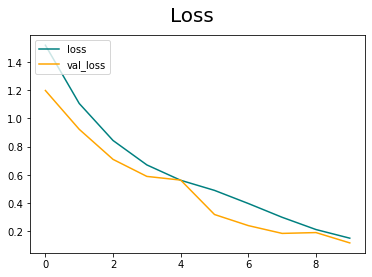

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [34]:
print(hist.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


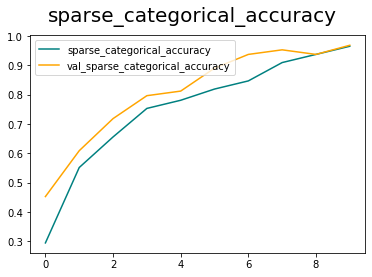

In [35]:
fig = plt.figure()
plt.plot(hist.history['sparse_categorical_accuracy'], color='teal', label='sparse_categorical_accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], color='orange', label='val_sparse_categorical_accuracy')
fig.suptitle('sparse_categorical_accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
len(test)

1

In [39]:
for element in test_data.as_numpy_iterator(): 
    X, y = element
    yhat = model.predict(X)
    pred = (np.argmax(yhat, axis=-1))
    # pre.update_state(y, yhat)
    # re.update_state(y, yhat)
    # acc.update_state(y, yhat)

    # print (yhat)
    # print (y)

print (y)

[2 1 1 2 1 0 0 1 3 3 0 1 0 2 1 2 1 2 0 0 2 2 1 1 0 3 3 2 2 2 3 1 0 2 3 2 3
 0 3 2 0 2 0 1 3 3 3 3 1 0 2 2 0 2 3 0 0 3 3 0 1 1 2 3 2 1 1 2 3 0 0 3 3 1
 2 1 3 2 2 3 2 2 0 0 1 0 1 2 3 0 1 0 1 1 2 2 3 3 3 3 0 2 3 0 0 3 2 0 0 2 1
 0 2 0 2]


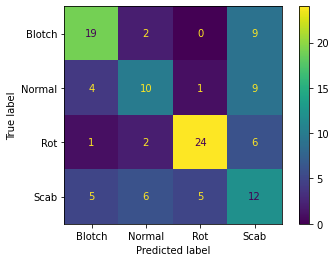

In [40]:

# plt.plot(history.history['accuracy'], label='Train accuracy')
# plt.plot(history_test.history['accuracy'], label = 'Test accuracy')

actual = y
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])

cm_display.plot()
plt.show()

In [41]:
testscore = model.evaluate(test_data)

1/1 [==============================] - 1s 943ms/step - loss: 1.7704 - sparse_categorical_accuracy: 0.5652


In [42]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [43]:
import cv2

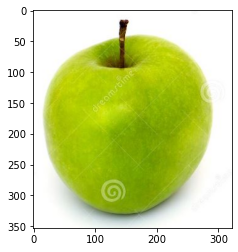

In [44]:
img = cv2.imread('data/Test/Normal_Apple/normal_2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

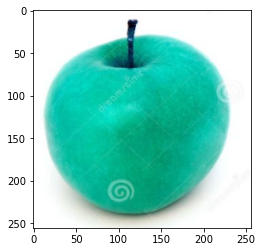

In [45]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
yhat = model.predict(np.expand_dims(resize/255, 0))
pred = np.argmax(yhat, axis=-1)

In [47]:
if pred == [3]: print ('the model predicts an apple with scab')
elif pred == [2]: print ('the model predicts an apple with rot')
elif pred == [1]: print ('the model predicts this is a normal healthy apple')
elif pred == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts an apple with scab


if num > 0:
    print("Positive number")
elif num == 0:
    print("Zero")
else:
    print("Negative number")

# 11. Save the Model and test loading the Model

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join('models','appleclassifier422pa.h5'))

In [50]:
new_model = load_model('models/appleclassifier422pa.h5')

In [51]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

In [52]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

In [53]:
pred_new = np.argmax(yhat_new, axis=-1)

In [54]:
if pred_new == [3]: print ('the model predicts an apple with scab')
elif pred_new == [2]: print ('the model predicts an apple with rot')
elif pred_new == [1]: print ('the model predicts this is a normal healthy apple')
elif pred_new == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts an apple with scab


De vragen die ik bij 2_1 nog had zijn beantwoord door uitwerking 

Nieuwe vraag:

voor het aanmaken van de data moet ik soms onderstaand commando runnen bij foutmelding:

find . -name "*.DS_Store" -type f -delete

wat is dit?


Van to do 1_2 zijn confusion matrix en plots afgehandeld

new to do - 
To do - image rescalen naar 100x100
expirimenteren met model / dataset en augmentation
transfer learning